ALIFI LAZUARDI GUNAWAN

BLITAR, JAWA TIMUR

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow import keras
import tensorflow as tf
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
# !pip install split-folders
# import splitfolders
import os

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alifilazuardi","key":"793e266a45b46401d057a36a6d4e9bd9"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d lucassj/dogs-vs-cats-train-validadion-and-evaluation

100% 1.07G/1.07G [00:27<00:00, 49.0MB/s]
100% 1.07G/1.07G [00:27<00:00, 42.6MB/s]


In [ ]:
!unzip '/content/dogs-vs-cats-train-validadion-and-evaluation' -d data

In [9]:
path = '/content/data/data/train'

In [10]:
os.listdir(path)

['dog', 'cat']

In [11]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 45,
                    shear_range = 0.2, 
                    zoom_range = 0.2, 
                    validation_split=0.2)

In [12]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

In [13]:
train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        color_mode='rgb', 
        shuffle=True,
        class_mode='categorical',
        subset='training')


Found 16000 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        color_mode='rgb', 
        shuffle=True,
        class_mode='categorical',
        subset='validation')

Found 4000 images belonging to 2 classes.


In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    val = logs.get('val_accuracy')
    acc = logs.get('accuracy')
    if(val>0.92 and acc>0.92):
      print('\n Stop')
      self.model.stop_training = True
callbacks = myCallback()

In [16]:
pre_trained_model = VGG16(input_shape = (224, 224, 3), weights='imagenet',  include_top = False)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [17]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [19]:
opt = keras.optimizers.RMSprop(lr=0.0001)

model.compile(optimizer = opt,
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 27,561,282
Trainable params: 12,846,594
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=50,
      validation_data=validation_generator,
      validation_steps= 100,
      callbacks=[callbacks],
      verbose= 1)

Epoch 1/50
100/100 [==============================] - 72s 575ms/step - loss: 0.5807 - accuracy: 0.7356 - val_loss: 0.3456 - val_accuracy: 0.8431
Epoch 2/50
100/100 [==============================] - 58s 576ms/step - loss: 0.3927 - accuracy: 0.8269 - val_loss: 0.2911 - val_accuracy: 0.8684
Epoch 3/50
100/100 [==============================] - 58s 577ms/step - loss: 0.3387 - accuracy: 0.8553 - val_loss: 0.3372 - val_accuracy: 0.8428
Epoch 4/50
100/100 [==============================] - 58s 579ms/step - loss: 0.3133 - accuracy: 0.8631 - val_loss: 0.2189 - val_accuracy: 0.9047
Epoch 5/50
100/100 [==============================] - 58s 580ms/step - loss: 0.3100 - accuracy: 0.8650 - val_loss: 0.1928 - val_accuracy: 0.9212
Epoch 6/50
100/100 [==============================] - 58s 581ms/step - loss: 0.2860 - accuracy: 0.8778 - val_loss: 0.1874 - val_accuracy: 0.9228
Epoch 7/50
100/100 [==============================] - 58s 579ms/step - loss: 0.2740 - accuracy: 0.8816 - val_loss: 0.1804 - val_ac

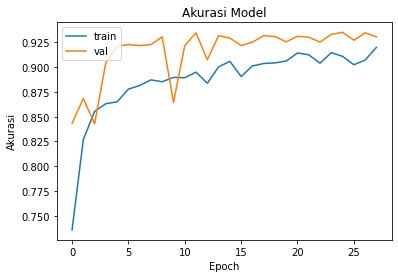

In [21]:
#plot akurasi
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

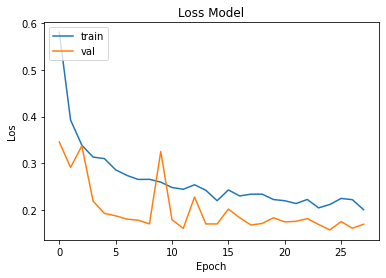

In [22]:
#plot Loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Los')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 322868_1100-800x825.jpg to 322868_1100-800x825.jpg
[[0. 1.]]


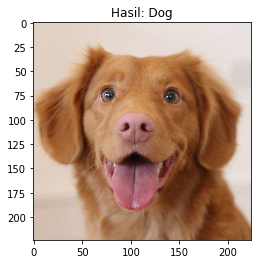

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])

  resultProb = model.predict(images) 
  resultLabel = resultProb.argmax(axis=-1)

  print(resultProb)

  # printing images based on class
  if resultLabel == 0:
    plt.title("Hasil: cat")
  else :
    plt.title("Hasil: Dog")

In [24]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [26]:
!ls

322868_1100-800x825.jpg				  kaggle.json
data						  model.tflite
dogs-vs-cats-train-validadion-and-evaluation.zip  sample_data
